In [1]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter
import sys
sys.path.append("pybaselines-main")
from pybaselines import Baseline
import matplotlib.pyplot as plt
import os

In [3]:
def load_IR(path, labels=[]):
    """
    Load the IR data from a CSV files in a specified folder.
    Returns the data in a dictionary format.
    The function takes a path to the folder containing the CSV files.
    """
    
    # Dictionary to store dataframes
    dataframes = {}
    
    # loop through files in the path
    for file in os.listdir(path):
        if file.endswith('.csv'):
            for name in labels:
                if name in file:
                    # Count number of occurances of the name in the file name
                    count = sum(1 for n in dataframes if n.startswith(name)) + 1
                    var_name = f"{name}_{count}"  # Generate variable name
                    
                    # Read the CSV file
                    file_path = os.path.join(path, file)
                    df = pd.read_csv(file_path)

                    # Store both the DataFrame and the filename
                    dataframes[var_name] = {"data": df, "filename": file}

                    print(f"Loaded {file} as {var_name}")
    
    return dataframes

In [3]:
names = ["ACBCM"]

data = load_IR("../IR-Data", names)

Loaded ACBCM_KMS0007_ATR_20241126_01.csv as ACBCM_1
Loaded ACBCM_KMS0008_ATR_20241126_01.csv as ACBCM_2
Loaded ACBCM_KMS0009_ATR_20241126_01.csv as ACBCM_3
Loaded ACBCM_KMS0010_ATR_20241127_01.csv as ACBCM_4
Loaded ACBCM_KMS0013_ATR_20241128_01.csv as ACBCM_5
Loaded ACBCM_KMS0014_ATR_20241129_01.csv as ACBCM_6
Loaded ACBCM_KMS0016_ATR_20241129_01.csv as ACBCM_7
Loaded ACBCM_KMS0017_ATR_20241129_01.csv as ACBCM_8
Loaded ACBCM_KMS0018_ATR_20241129_01.csv as ACBCM_9
Loaded ACBCM_KMS0025_ATR_20241129_01.csv as ACBCM_10
Loaded ACBCM_KMS0026_ATR_20241129_01.csv as ACBCM_11
Loaded ACBCM_KMS0027_ATR_20241129_01.csv as ACBCM_12
Loaded ACBCM_KMS0028_ATR_20241129_01.csv as ACBCM_13
Loaded ACBCM_KMS0029_ATR_20241129_01.csv as ACBCM_14
Loaded ACBCM_KMS0030_ATR_20241130_01.csv as ACBCM_15
Loaded ACBCM_KMS0031_ATR_20241130_01.csv as ACBCM_16
Loaded ACBCM_KMS0032_ATR_20250117_01.csv as ACBCM_17
Loaded ACBCM_KMS0033_ATR_20250117_01.csv as ACBCM_18


Loaded ACBCM_KMS0007_ATR_20241126_01.csv as ACBCM_1
Loaded ACBCM_KMS0008_ATR_20241126_01.csv as ACBCM_2
Loaded ACBCM_KMS0009_ATR_20241126_01.csv as ACBCM_3
Loaded ACBCM_KMS0010_ATR_20241127_01.csv as ACBCM_4
Loaded ACBCM_KMS0013_ATR_20241128_01.csv as ACBCM_5
Loaded ACBCM_KMS0014_ATR_20241129_01.csv as ACBCM_6
Loaded ACBCM_KMS0016_ATR_20241129_01.csv as ACBCM_7
Loaded ACBCM_KMS0017_ATR_20241129_01.csv as ACBCM_8
Loaded ACBCM_KMS0018_ATR_20241129_01.csv as ACBCM_9
Loaded ACBCM_KMS0025_ATR_20241129_01.csv as ACBCM_10
Loaded ACBCM_KMS0026_ATR_20241129_01.csv as ACBCM_11
Loaded ACBCM_KMS0027_ATR_20241129_01.csv as ACBCM_12
Loaded ACBCM_KMS0028_ATR_20241129_01.csv as ACBCM_13
Loaded ACBCM_KMS0029_ATR_20241129_01.csv as ACBCM_14
Loaded ACBCM_KMS0030_ATR_20241130_01.csv as ACBCM_15
Loaded ACBCM_KMS0031_ATR_20241130_01.csv as ACBCM_16
Loaded ACBCM_KMS0032_ATR_20250117_01.csv as ACBCM_17
Loaded ACBCM_KMS0033_ATR_20250117_01.csv as ACBCM_18


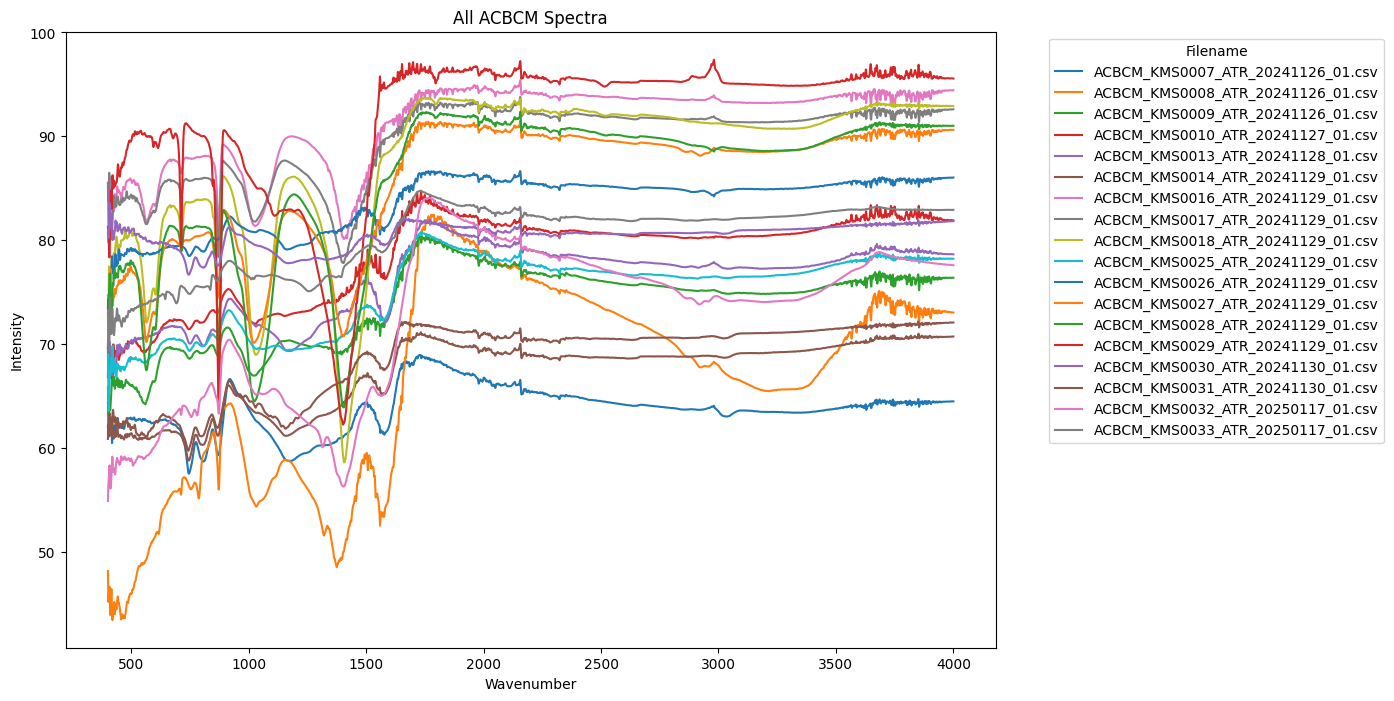

In [4]:
names = ["ACBCM"]

data = load_IR("../IR-Data", names)

# # Normalize y data to range 0-1 for all spectra and overwrite data
# for key, value in data.items():
#     df = value['data']
#     y = df.iloc[:, 1]
#     y_min = y.min()
#     y_max = y.max()
#     y_normalized = (y - y_min) / (y_max - y_min)
#     df_normalized = df.copy()
#     df_normalized.iloc[:, 1] = y_normalized
#     data[key]['data'] = df_normalized
    

plt.figure(figsize=(12, 8))
for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    label = value['filename']  # Use filename as legend label
    plt.plot(x, y, label=label)

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('All ACBCM Spectra')
plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Loaded JSN_TubefurnaceJS2503.0.csv as Tube_1
Loaded JSN_TubefurnaceJS2503_2.0.csv as Tube_2
Loaded JSN_TubefurnaceJS2503_3.0.csv as Tube_3


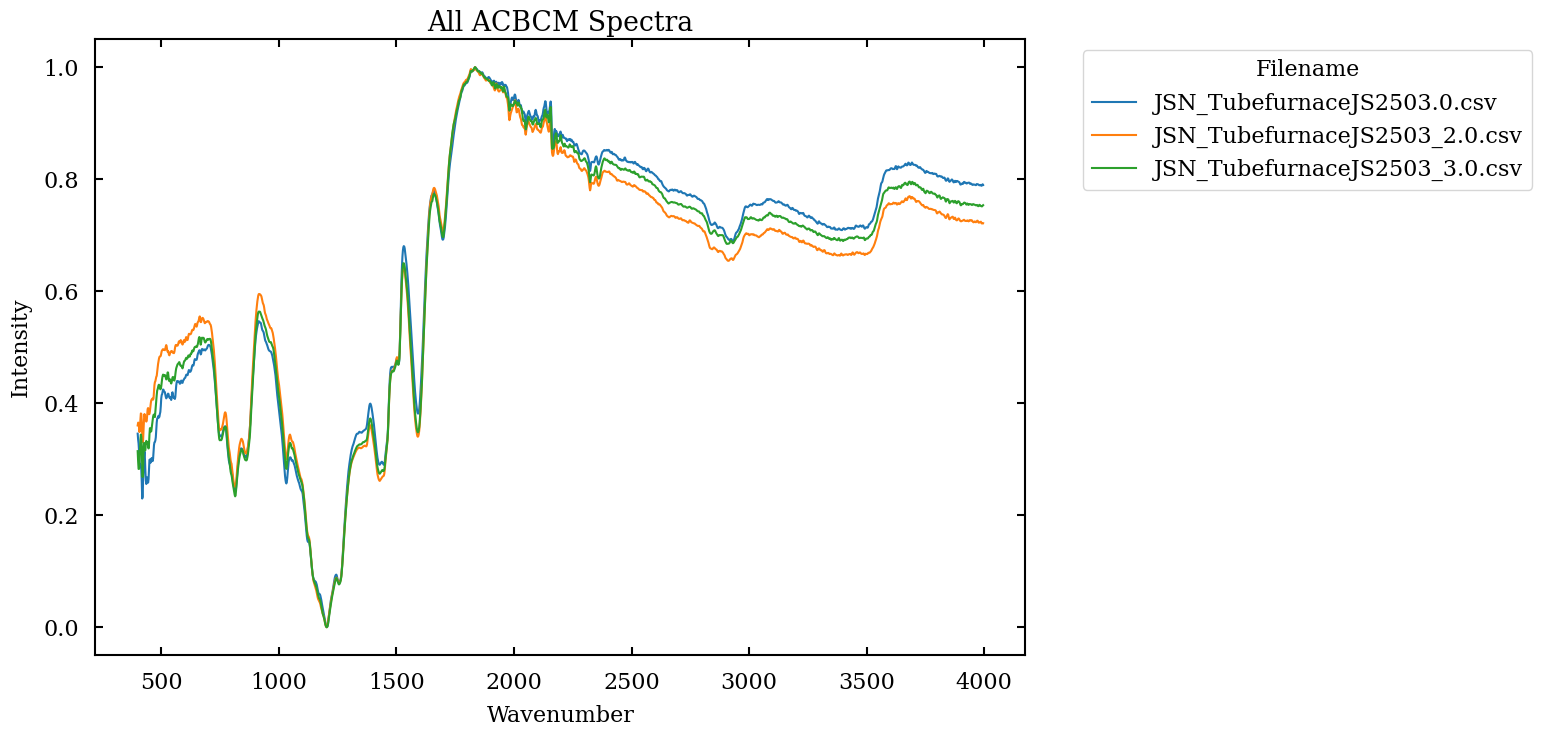

In [17]:
names = ["Tube"]

data = load_IR("../IR-Data", names)

# Normalize y data to range 0-1 for all spectra and overwrite data
for key, value in data.items():
    df = value['data']
    y = df.iloc[:, 1]
    y_min = y.min()
    y_max = y.max()
    y_normalized = (y - y_min) / (y_max - y_min)
    df_normalized = df.copy()
    df_normalized.iloc[:, 1] = y_normalized
    data[key]['data'] = df_normalized
    

plt.figure(figsize=(12, 8))
for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    label = value['filename']  # Use filename as legend label
    plt.plot(x, y, label=label)

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('All ACBCM Spectra')
plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Loaded JSN_Peters Biochar Sep 24 256.0.csv as Pet_1
Loaded JSN_Peters Biochar Sep 24 256.1.csv as Pet_2
Loaded JSN_Peters Biochar Sep 24.0.csv as Pet_3


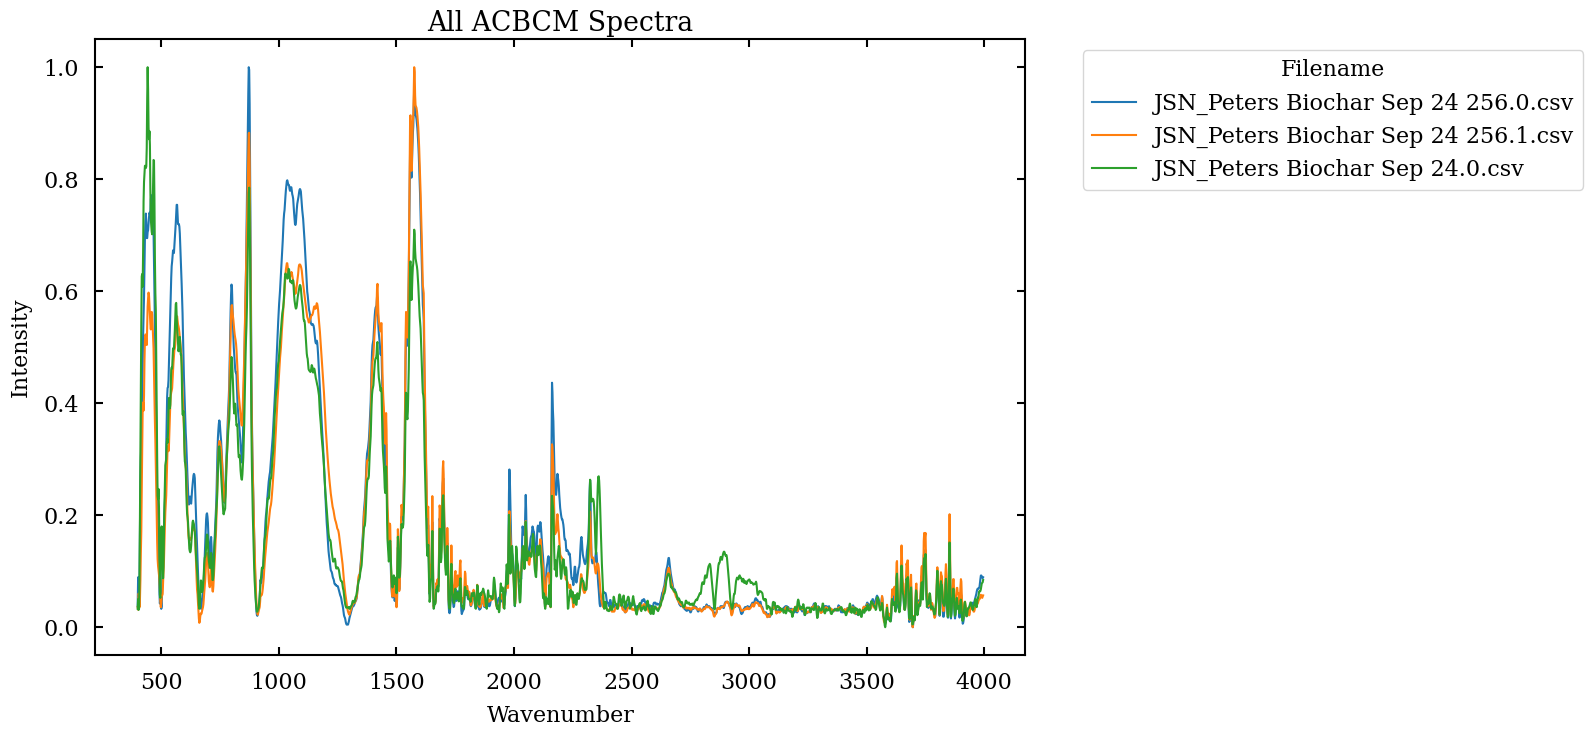

In [18]:
names = ["Pet"]

data = load_IR("../IR-Data", names)

# Normalize y data to range 0-1 for all spectra and overwrite data
for key, value in data.items():
    df = value['data']
    y = df.iloc[:, 1]
    y_min = y.min()
    y_max = y.max()
    y_normalized = (y - y_min) / (y_max - y_min)
    df_normalized = df.copy()
    df_normalized.iloc[:, 1] = y_normalized
    data[key]['data'] = df_normalized
    

plt.figure(figsize=(12, 8))
for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    label = value['filename']  # Use filename as legend label
    plt.plot(x, y, label=label)

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('All ACBCM Spectra')
plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Jackt\AppData\Local\Temp\ipykernel_17668\2305482681.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')


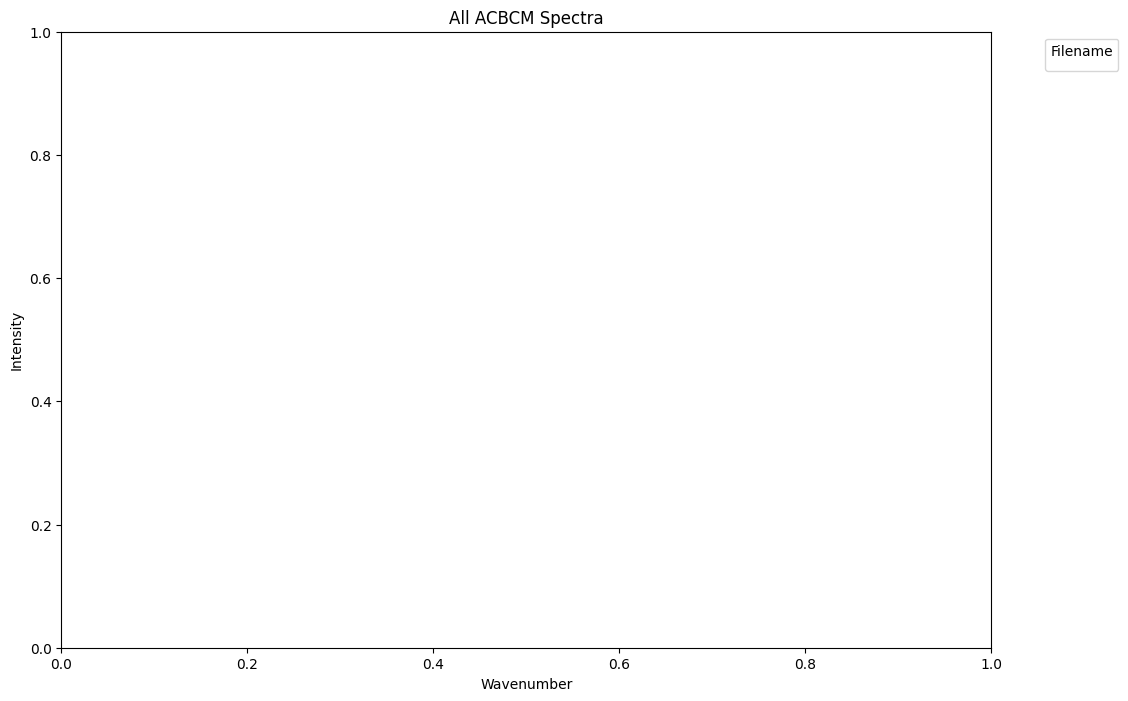

In [7]:
names = ["Spec"]

data = load_IR("../IR-Data", names)

# # Normalize y data to range 0-1 for all spectra and overwrite data
# for key, value in data.items():
#     df = value['data']
#     y = df.iloc[:, 1]
#     y_min = y.min()
#     y_max = y.max()
#     y_normalized = (y - y_min) / (y_max - y_min)
#     df_normalized = df.copy()
#     df_normalized.iloc[:, 1] = y_normalized
#     data[key]['data'] = df_normalized
    

plt.figure(figsize=(12, 8))
for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    label = value['filename']  # Use filename as legend label
    plt.plot(x, y, label=label)

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('All ACBCM Spectra')
plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
output_folder = "../IR-Data/ForgeDPT"
os.makedirs(output_folder, exist_ok=True)

for key, value in data.items():
    df = value['data']
    filename = value['filename']
    # Change extension to .dpt
    dpt_filename = os.path.splitext(filename)[0] + ".dpt"
    dpt_path = os.path.join(output_folder, dpt_filename)
    # Save as space-separated, no header, no index
    df.to_csv(dpt_path, sep=' ', header=False, index=False)
    print(f"Saved {dpt_path}")

In [9]:
output_folder = "../IR-Data/ForgeDPT"
os.makedirs(output_folder, exist_ok=True)

for key, value in data.items():
    df = value['data']
    filename = value['filename']
    
    # Reverse the order of the DataFrame
    df = df.iloc[::-1]
    
    # Change extension to .dpt
    dpt_filename = os.path.splitext(filename)[0] + ".dpt"
    dpt_path = os.path.join(output_folder, dpt_filename)
    
    # Save as space-separated, no header, no index
    df.to_csv(dpt_path, sep=' ', header=False, index=False)
    print(f"Saved {dpt_path}")


In [10]:
names = ["Peters"]

data = load_IR("../IR-Data", names)



# Combine all spectra into a single DataFrame with one x-axis and each file's intensity as a separate column
combined_df = None

for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    label = os.path.splitext(value['filename'])[0]  # Use filename (without extension) as column name
    temp_df = pd.DataFrame({ 'Wavenumber': x, label: y })
    if combined_df is None:
        combined_df = temp_df
    else:
        combined_df = pd.merge(combined_df, temp_df, on='Wavenumber', how='outer')

# Sort by Wavenumber descending if needed
combined_df = combined_df.sort_values('Wavenumber', ascending=False)

# Save to CSV
specifiedname = names[0]  # Use the first name in the list as the specified name
combined_filename = f"{specifiedname}_combined.csv"
combined_df.to_csv(combined_filename, index=False)
print(f"Saved combined file as {combined_filename}")


Loaded JSN_Peters Biochar Sep 24 256.0.csv as Peters_1
Loaded JSN_Peters Biochar Sep 24 256.1.csv as Peters_2
Loaded JSN_Peters Biochar Sep 24.0.csv as Peters_3
Saved combined file as Peters_combined.csv


In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

names = ["ACBC"]
data = load_IR(r"..\IR-Data\COS\Raw", names)

combined_df = None

for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    
    # Normalize intensity (y) to range [0, 1]
    y_normalized = (y - y.min()) / (y.max() - y.min())
    
    label = os.path.splitext(value['filename'])[0]  # Use filename (without extension) as column name
    temp_df = pd.DataFrame({'Wavenumber': x, label: y_normalized})
    
    if combined_df is None:
        combined_df = temp_df
    else:
        combined_df = pd.merge(combined_df, temp_df, on='Wavenumber', how='outer')

# Reverse to go from 500 to 4000 cm^-1 if necessary
combined_df = combined_df.iloc[::-1]

# Save combined and normalized data
specifiedname = names[0]
combined_filename = f"{specifiedname}_C.csv"
combined_df.to_csv(combined_filename, index=False)
print(f"Saved combined file as {combined_filename}")


AttributeError: 'NoneType' object has no attribute 'iloc'

CODE FOR MESH
----

In [15]:
import math
import numpy
import pandas
from matplotlib import pyplot

hetero = False
inputfile1 = "ACBCM_C.csv"

# hetero=True
# inputfile1="spec1.csv"
# inputfile2="spec2.csv"

left_large = True
dynamic = True
num_contour = 16

# file read
spec1 = pandas.read_csv(inputfile1, header=0, index_col=0).T
if hetero == False:
    inputfile2 = inputfile1
spec2 = pandas.read_csv(inputfile2, header=0, index_col=0).T
if len(spec1) != len(spec2):
    raise Exception("data mismatching")
if dynamic:
    spec1 = spec1 - spec1.mean()
    spec2 = spec2 - spec2.mean()
    
# synchronous correlation
sync = pandas.DataFrame(spec1.values.T @ spec2.values / (len(spec1) - 1))
sync.index = spec1.columns
sync.columns = spec2.columns
sync = sync.T
sync.to_csv(inputfile1[: len(inputfile1) - 4] + "_sync.csv")

# Hilbert-Noda transformation matrix
noda = numpy.zeros((len(spec1), len(spec1)))
for i in range(len(spec1)):
    for j in range(len(spec1)):
        if i != j: noda[i, j] = 1 / math.pi / (j - i)
        
# asynchronouse correlation
asyn = pandas.DataFrame(spec1.values.T @ noda @ spec2.values / (len(spec1) - 1))
asyn.index = spec1.columns
asyn.columns = spec2.columns
asyn = asyn.T
asyn.to_csv(inputfile1[: len(inputfile1) - 4] + "_async.csv")

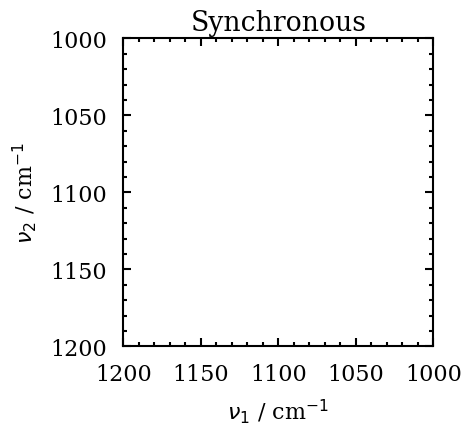

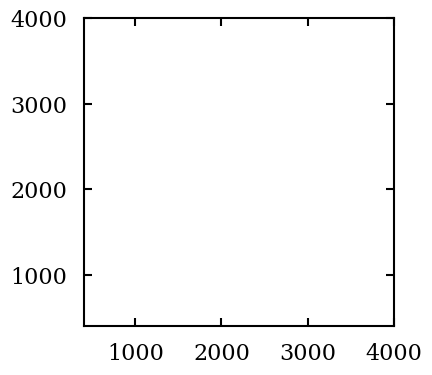

In [ ]:
import numpy
import pandas
from matplotlib import pyplot
from matplotlib import ticker

data_file = "ACBCM_C_sync.csv"
num_contour = 8
pyplot.rcParams["axes.linewidth"] = 1.5
pyplot.rcParams["figure.dpi"] = 100
pyplot.rcParams["figure.figsize"] = (4, 4)
pyplot.rcParams["font.family"] = "serif"
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["xtick.major.width"] = 1.5
pyplot.rcParams["ytick.major.width"] = 1.5
pyplot.rcParams["xtick.minor.width"] = 1.5
pyplot.rcParams["ytick.minor.width"] = 1.5
pyplot.rcParams["xtick.major.size"] = 6
pyplot.rcParams["ytick.major.size"] = 6
pyplot.rcParams["xtick.minor.size"] = 3
pyplot.rcParams["ytick.minor.size"] = 3
pyplot.rcParams["axes.labelpad"] = 8
pyplot.rcParams["xtick.major.pad"] = 12
pyplot.rcParams["ytick.major.pad"] = 12
pyplot.rcParams["xtick.top"] = True
pyplot.rcParams["ytick.right"] = True
pyplot.rcParams["xtick.direction"] = "in"
pyplot.rcParams["ytick.direction"] = "in"

data = pandas.read_csv(data_file, header=0, index_col=0)
x = data.columns[0:].astype(float)
y = data.index[0:].astype(float)
z = data.values
zmax = numpy.absolute(z).max()

fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, num_contour, cmap="bwr", vmin=-1 * zmax, vmax=zmax)

ax.set_xlim(1200, 1000)
ax.set_xticks(numpy.arange(1200, 1000 - 1, -50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

ax.set_ylim(1200, 1000)
ax.set_yticks(numpy.arange(1200, 1000 - 1, -50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

ax.set_title("Synchronous")
ax.set_xlabel(r"$\nu$${_{1}}$ / cm${^{-1}}$")
ax.set_ylabel(r"$\nu$${_{2}}$ / cm${^{-1}}$")

pyplot.savefig("contour.png", dpi=200, bbox_inches="tight")

fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, num_contour, cmap="bwr", vmin=-1 * zmax, vmax=zmax)

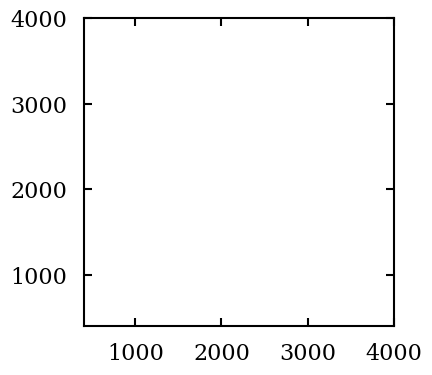

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pcolormesh(x, y, z, cmap="bwr", vmin=-1 * zmax, vmax=zmax)

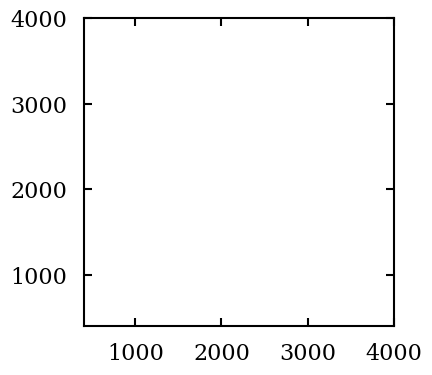

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, num_contour, colors="black", linewidths=0.5, linestyles="solid", vmin=-1 * zmax, vmax=zmax)
ax.pcolormesh(x, y, z, cmap="jet", vmin=-1 * zmax, vmax=zmax)

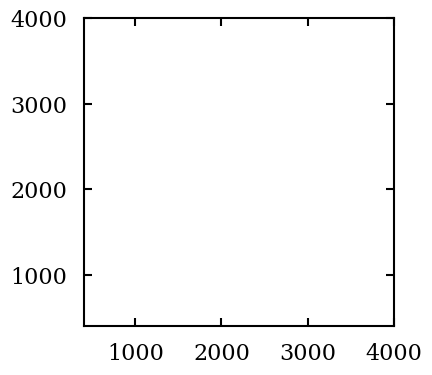

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, num_contour, colors="black", linewidths=0.5, vmin=-1 * zmax, vmax=zmax)
ax.contourf(x, y, z, levels=0, colors=["gray", "white"], vmin=-1 * zmax, vmax=zmax)

---

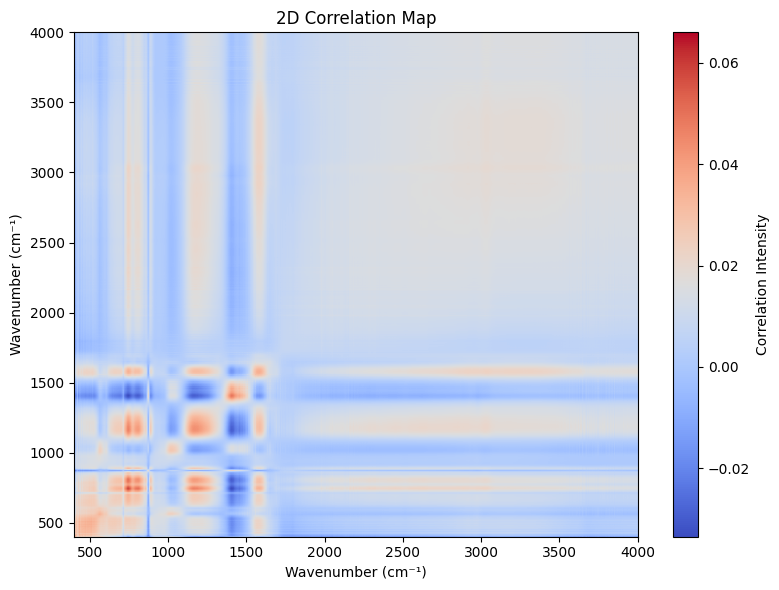

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('Shige test.csv', header=None)

# Extract wavenumbers
wavenumbers_x = df.iloc[0, 1:].astype(float).values  # Top row, excluding the first empty cell
wavenumbers_y = df.iloc[1:, 0].astype(float).values  # First column, excluding the first row

# Extract the 2D correlation data
data = df.iloc[1:, 1:].astype(float).values

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='auto', cmap='coolwarm')
plt.colorbar(label='Correlation Intensity')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.title('2D Correlation Map')
plt.tight_layout()
plt.show()


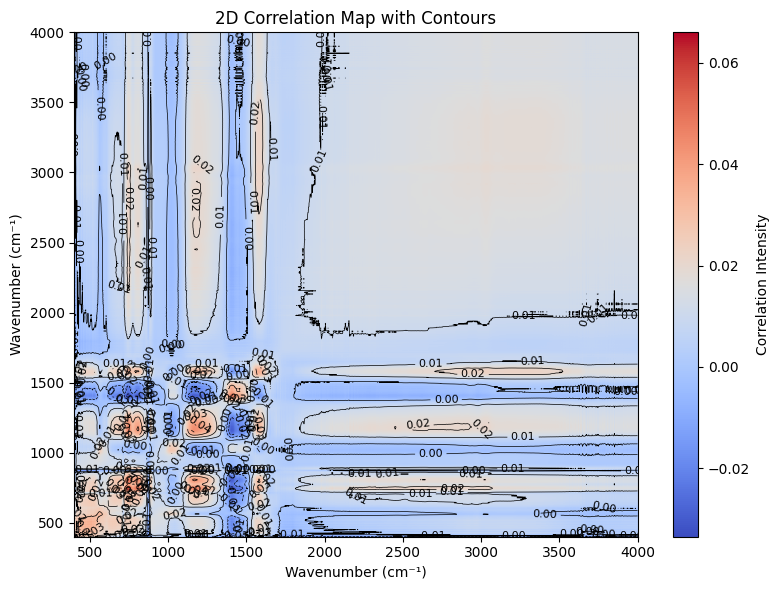

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Shige test.csv', header=None)

# Extract wavenumbers
wavenumbers_x = df.iloc[0, 1:].astype(float).values
wavenumbers_y = df.iloc[1:, 0].astype(float).values

# Extract the 2D correlation data
data = df.iloc[1:, 1:].astype(float).values

# Create the plot
plt.figure(figsize=(8, 6))

# Colormap (background)
mesh = plt.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='auto', cmap='coolwarm')

# Add contour lines
contours = plt.contour(wavenumbers_x, wavenumbers_y, data, levels=10, colors='black', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.2f")  # Optional: label contour lines

# Colorbar
plt.colorbar(mesh, label='Correlation Intensity')

# Labels and title
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.title('2D Correlation Map with Contours')
plt.tight_layout()
plt.show()


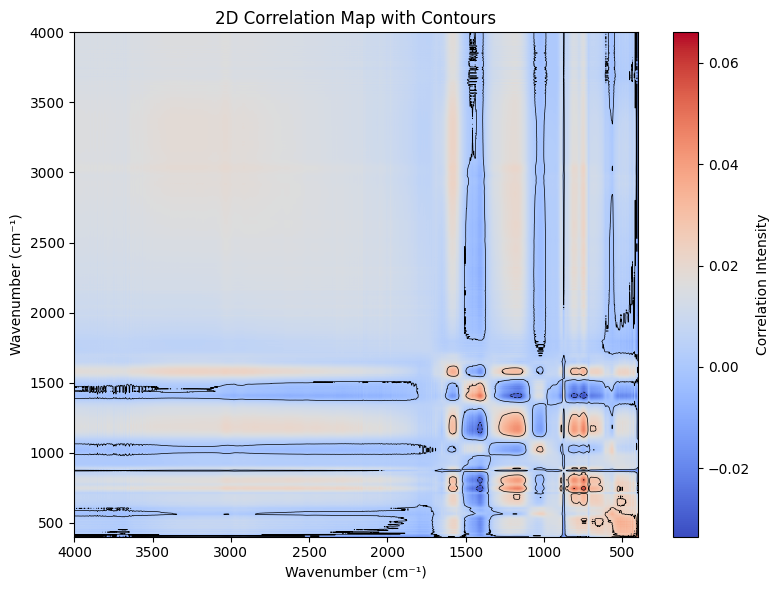

In [14]:
# Create the plot
plt.figure(figsize=(8, 6))

# Colormap (background)
mesh = plt.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='auto', cmap='coolwarm')

# Add contour lines
contours = plt.contour(wavenumbers_x, wavenumbers_y, data, levels=3, colors='black', linewidths=0.5)

# Colorbar
plt.colorbar(mesh, label='Correlation Intensity')

# Labels and title
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.title('2D Correlation Map with Contours')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

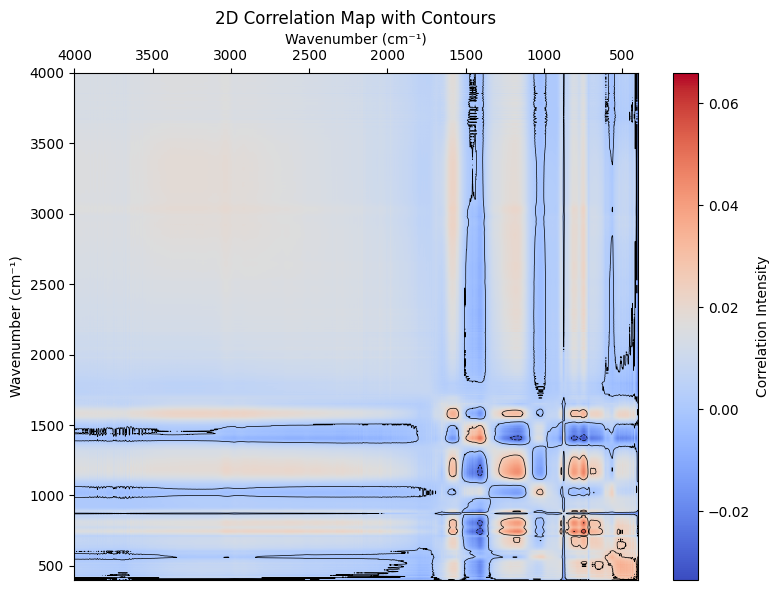

In [15]:
# Create the plot
plt.figure(figsize=(8, 6))

# Colormap (background)
mesh = plt.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='auto', cmap='coolwarm')

# Add contour lines
contours = plt.contour(wavenumbers_x, wavenumbers_y, data, levels=3, colors='black', linewidths=0.5)

# Colorbar
plt.colorbar(mesh, label='Correlation Intensity')

# Labels and title
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.title('2D Correlation Map with Contours')

plt.gca().invert_xaxis()
plt.gca().xaxis.set_ticks_position('top')   # Show ticks on top
plt.gca().xaxis.set_label_position('top')   # Move x-axis label to top

plt.tight_layout()
plt.show()

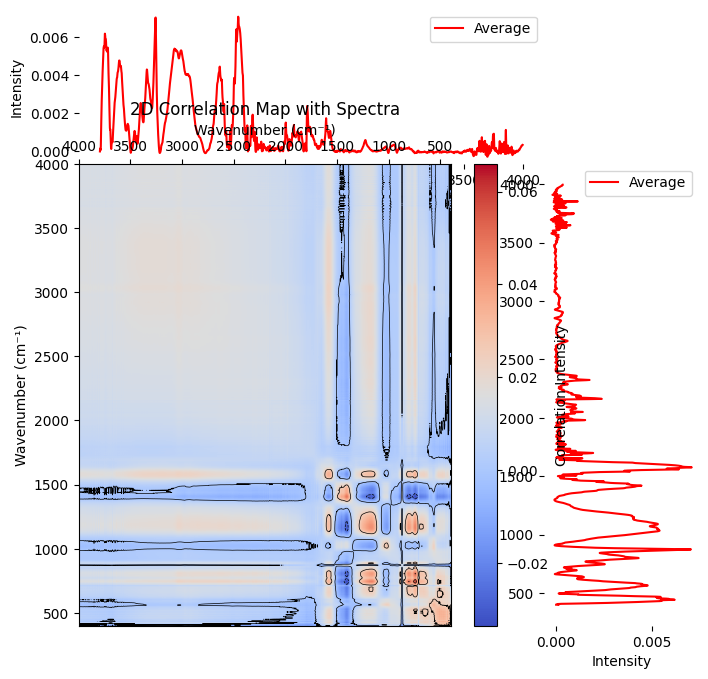

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import pandas as pd

# Load CSV file
file_path = "Peters_combined.csv"  # Replace with the actual file path
Idata = pd.read_csv(file_path, skiprows=1, header=None)

# Load the CSV file
df = pd.read_csv('Shige test.csv', header=None)

# Extract wavenumbers
wavenumbers_x = df.iloc[0, 1:].astype(float).values
wavenumbers_y = df.iloc[1:, 0].astype(float).values

# Extract the 2D correlation data
data = df.iloc[1:, 1:].astype(float).values

# Extract wavenumbers and numerical data
Iwavenumbers = Idata.iloc[:, 0]  # First column
Ivalues = Idata.iloc[:, 1:]  # Columns 1, 2, and 3

avg_values = Ivalues.mean(axis=1)

# Create figure with a specific grid layout
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3], hspace=0, wspace=0)

# Top subplot (x-axis spectra)
ax_top = fig.add_subplot(gs[0, 0])
ax_top.plot(Iwavenumbers, avg_values, color="red", label="Average")
ax_top.legend()
ax_top.set_ylabel("Intensity")
ax_top.set_frame_on(False)

# Left subplot (y-axis spectra)
ax_left = fig.add_subplot(gs[1, 1])
ax_left.plot(avg_values, Iwavenumbers, color="red", label="Average")
ax_left.legend()
ax_left.set_xlabel("Intensity")
ax_left.set_frame_on(False)


# Main 2D correlation map
ax_main = fig.add_subplot(gs[1, 0])
mesh = ax_main.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='nearest', cmap='coolwarm')
contours = ax_main.contour(wavenumbers_x, wavenumbers_y, data, levels=3, colors='black', linewidths=0.5)
plt.colorbar(mesh, ax=ax_main, label='Correlation Intensity')

# Formatting
ax_main.set_xlabel('Wavenumber (cm⁻¹)')
ax_main.set_ylabel('Wavenumber (cm⁻¹)')
ax_main.set_title('2D Correlation Map with Spectra')
ax_main.invert_xaxis()
ax_main.xaxis.set_ticks_position('top')  
ax_main.xaxis.set_label_position('top')  

plt.show()


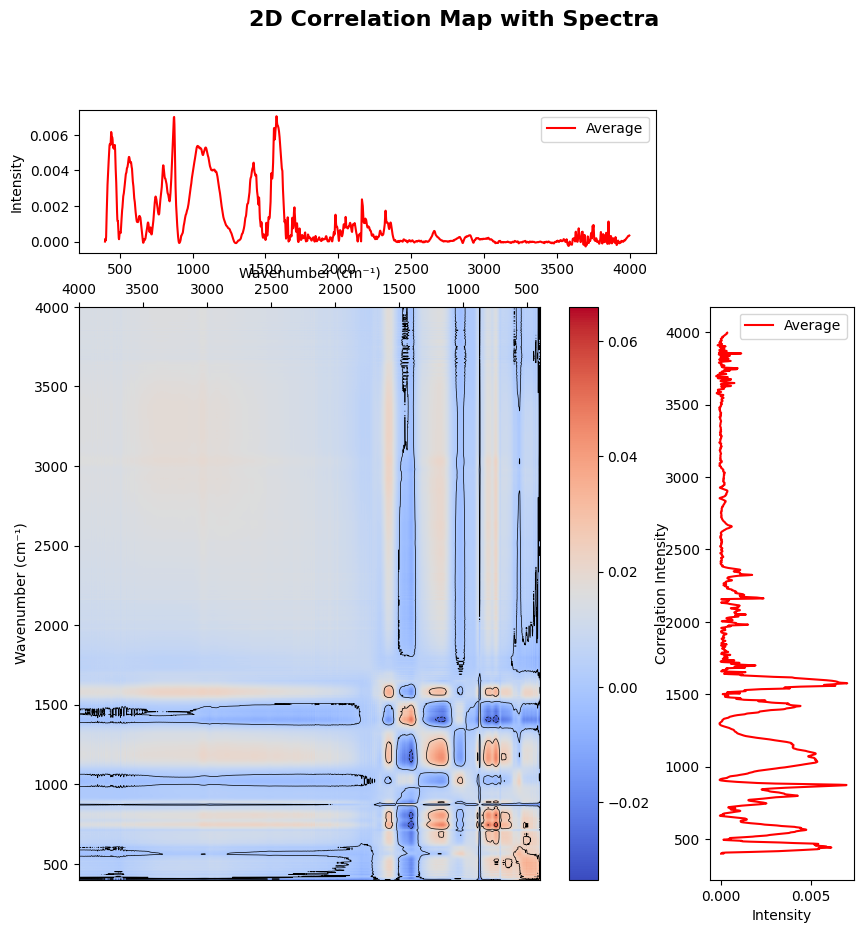

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import pandas as pd

# Load CSV files
file_path = "Peters_combined.csv"  # Replace with the actual file path
Idata = pd.read_csv(file_path, skiprows=1, header=None)

df = pd.read_csv('Shige test.csv', header=None)

# Extract wavenumbers
wavenumbers_x = df.iloc[0, 1:].astype(float).values
wavenumbers_y = df.iloc[1:, 0].astype(float).values

# Extract 2D correlation data
data = df.iloc[1:, 1:].astype(float).values

# Extract wavenumbers and numerical data
Iwavenumbers = Idata.iloc[:, 0]  # First column
Ivalues = Idata.iloc[:, 1:]  # Columns 1, 2, and 3

avg_values = Ivalues.mean(axis=1)

# Create figure with a specific grid layout
fig = plt.figure(figsize=(10, 10))  # Slightly larger figure
fig.suptitle("2D Correlation Map with Spectra", fontsize=16, fontweight="bold", y=0.98)

# Adjust spacing between subplots
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)

# Top subplot (x-axis spectra)
ax_top = fig.add_subplot(gs[0, 0])
ax_top.plot(Iwavenumbers, avg_values, color="red", label="Average")
ax_top.legend()
ax_top.set_ylabel("Intensity")
ax_top.set_frame_on(True)
ax_top.spines['top'].set_color('black')
ax_top.spines['bottom'].set_color('black')
ax_top.spines['left'].set_color('black')
ax_top.spines['right'].set_color('black')

# Left subplot (y-axis spectra)
ax_left = fig.add_subplot(gs[1, 1])
ax_left.plot(avg_values, Iwavenumbers, color="red", label="Average")
ax_left.legend()
ax_left.set_xlabel("Intensity")
ax_left.set_frame_on(True)
ax_left.spines['top'].set_color('black')
ax_left.spines['bottom'].set_color('black')
ax_left.spines['left'].set_color('black')
ax_left.spines['right'].set_color('black')

# Main 2D correlation map
ax_main = fig.add_subplot(gs[1, 0])
mesh = ax_main.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='nearest', cmap='coolwarm')
contours = ax_main.contour(wavenumbers_x, wavenumbers_y, data, levels=3, colors='black', linewidths=0.5)
plt.colorbar(mesh, ax=ax_main, label='Correlation Intensity')

# Formatting main plot
ax_main.set_xlabel('Wavenumber (cm⁻¹)')
ax_main.set_ylabel('Wavenumber (cm⁻¹)')
ax_main.invert_xaxis()
ax_main.xaxis.set_ticks_position('top')  
ax_main.xaxis.set_label_position('top')  
ax_main.spines['top'].set_color('black')
ax_main.spines['bottom'].set_color('black')
ax_main.spines['left'].set_color('black')
ax_main.spines['right'].set_color('black')

plt.show()


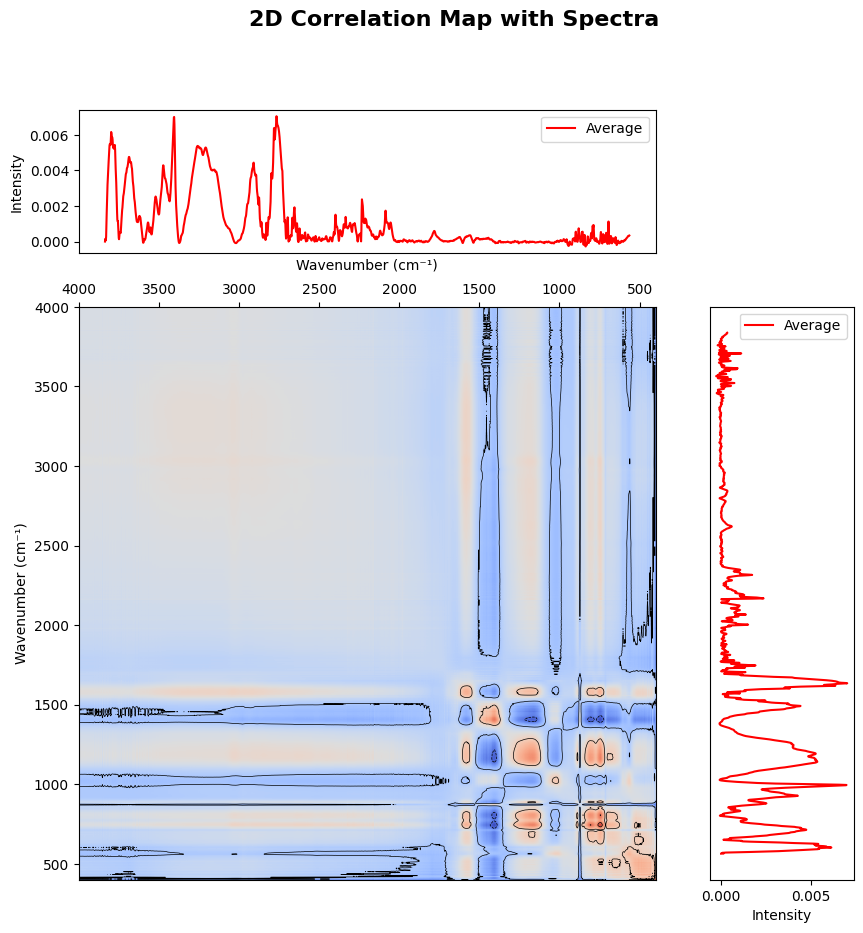

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import pandas as pd

# Load CSV files
file_path = "Peters_combined.csv"  # Replace with the actual file path
Idata = pd.read_csv(file_path, skiprows=1, header=None)

df = pd.read_csv('Shige test.csv', header=None)

# Extract wavenumbers
wavenumbers_x = df.iloc[0, 1:].astype(float).values
wavenumbers_y = df.iloc[1:, 0].astype(float).values

# Extract 2D correlation data
data = df.iloc[1:, 1:].astype(float).values

# Extract wavenumbers and numerical data
Iwavenumbers = Idata.iloc[:, 0]  # First column
Ivalues = Idata.iloc[:, 1:]  # Columns 1, 2, and 3

avg_values = Ivalues.mean(axis=1)

# Create figure with a specific grid layout
fig = plt.figure(figsize=(10, 10))
fig.suptitle("2D Correlation Map with Spectra", fontsize=16, fontweight="bold", y=0.98)

# Adjust grid to make spectra plots the same size as the main plot
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)

# Top subplot (x-axis spectra)
ax_top = fig.add_subplot(gs[0, 0])
ax_top.plot(Iwavenumbers, avg_values, color="red", label="Average")
ax_top.legend()
ax_top.set_ylabel("Intensity")
ax_top.set_frame_on(True)
ax_top.spines['top'].set_color('black')
ax_top.spines['bottom'].set_color('black')
ax_top.spines['left'].set_color('black')
ax_top.spines['right'].set_color('black')
ax_top.xaxis.set_ticks([])  # Hide x-axis ticks

# Left subplot (y-axis spectra)
ax_left = fig.add_subplot(gs[1, 1])
ax_left.plot(avg_values, Iwavenumbers, color="red", label="Average")
ax_left.legend()
ax_left.set_xlabel("Intensity")
ax_left.set_frame_on(True)
ax_left.spines['top'].set_color('black')
ax_left.spines['bottom'].set_color('black')
ax_left.spines['left'].set_color('black')
ax_left.spines['right'].set_color('black')
ax_left.yaxis.set_ticks([])  # Hide y-axis ticks

# Main 2D correlation map
ax_main = fig.add_subplot(gs[1, 0])
mesh = ax_main.pcolormesh(wavenumbers_x, wavenumbers_y, data, shading='nearest', cmap='coolwarm')
contours = ax_main.contour(wavenumbers_x, wavenumbers_y, data, levels=3, colors='black', linewidths=0.5)
# plt.colorbar(mesh, ax=ax_main, label='Correlation Intensity')

# Formatting main plot
ax_main.set_xlabel("Wavenumber (cm⁻¹)", labelpad=10)  # Move label above subplot
ax_main.xaxis.set_label_position('top')  
ax_main.set_ylabel("Wavenumber (cm⁻¹)")
ax_main.invert_xaxis()
ax_main.xaxis.set_ticks_position('top')  
ax_main.spines['top'].set_color('black')
ax_main.spines['bottom'].set_color('black')
ax_main.spines['left'].set_color('black')
ax_main.spines['right'].set_color('black')

plt.show()


In [23]:
import os
import pandas as pd

def convert_dpt_to_csv(directory):
    # Get all .dpt files in the specified directory
    dpt_files = [f for f in os.listdir(directory) if f.endswith(".dpt")]

    if not dpt_files:
        print("No .dpt files found in the directory.")
        return

    for dpt_file in dpt_files:
        dpt_path = os.path.join(directory, dpt_file)
        csv_filename = os.path.splitext(dpt_file)[0] + ".csv"
        csv_path = os.path.join(directory, csv_filename)

        # Read .dpt file
        with open(dpt_path, "r") as file:
            lines = file.readlines()

        # Parse data (assuming tab-separated values)
        data = [line.strip().split(",") for line in lines]

        # Convert to DataFrame
        df = pd.DataFrame(data, columns=["Wavenumber", "Intensity"])  # Adjust column names if needed

        # Save as CSV
        df.to_csv(csv_path, index=False)
        print(f"Converted {dpt_file} to {csv_filename}")

# Example usage: Provide the folder path where .dpt files are located
convert_dpt_to_csv(r"..\IR-Data\COS\Absorbance")  # Replace with the actual path


Converted ACBC_IR_20241119_BEA005_1p.dpt to ACBC_IR_20241119_BEA005_1p.csv
Converted ACBC_IR_20241126_BEA001_2p.dpt to ACBC_IR_20241126_BEA001_2p.csv
Converted ACBC_IR_20241126_BEA002_2p.dpt to ACBC_IR_20241126_BEA002_2p.csv
Converted ACBC_IR_20241126_BEA003_2p.dpt to ACBC_IR_20241126_BEA003_2p.csv
Converted ACBC_IR_20241126_BEA004_2p.dpt to ACBC_IR_20241126_BEA004_2p.csv
Converted ACBC_IR_20241126_BEA005_2p.dpt to ACBC_IR_20241126_BEA005_2p.csv
Converted ACBC_IR_20241126_BEA009_2p.dpt to ACBC_IR_20241126_BEA009_2p.csv
Converted ACBC_IR_20241126_BEA010_2p.dpt to ACBC_IR_20241126_BEA010_2p.csv
Converted ACBC_IR_20241202_BEA005_3p.dpt to ACBC_IR_20241202_BEA005_3p.csv
Converted ACBC_IR_20241202_BEA005_4p.dpt to ACBC_IR_20241202_BEA005_4p.csv


In [51]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Toggle normalization (set to True or False)
normalize = True

names = ["_2"]
data = load_IR(r"..\IR-Data\COS\Raw", names)

combined_df = None

for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    
    # Apply normalization if enabled
    if normalize:
        y = (y - y.min()) / (y.max() - y.min())

    label = os.path.splitext(value['filename'])[0]  # Use filename (without extension) as column name
    temp_df = pd.DataFrame({'Wavenumber': x, label: y})
    
    if combined_df is None:
        combined_df = temp_df
    else:
        combined_df = pd.merge(combined_df, temp_df, on='Wavenumber', how='outer')

# Reverse to go from 500 to 4000 cm^-1 if necessary
combined_df = combined_df.iloc[::-1]

# Save data with appropriate filename based on normalization setting
specifiedname = names[0]
filename_suffix = "_Normalized.csv" if normalize else "_Raw.csv"
combined_filename = f"{specifiedname}{filename_suffix}"
combined_df.to_csv(combined_filename, index=False)

print(f"Saved file as {combined_filename}")


Loaded ACBC_IR_20241119_BEA005_1.csv as _2_1
Loaded ACBC_IR_20241126_BEA001_2.csv as _2_2
Loaded ACBC_IR_20241126_BEA002_2.csv as _2_3
Loaded ACBC_IR_20241126_BEA003_2.csv as _2_4
Loaded ACBC_IR_20241126_BEA004_2.csv as _2_5
Loaded ACBC_IR_20241126_BEA005_2.csv as _2_6
Loaded ACBC_IR_20241126_BEA009_2.csv as _2_7
Loaded ACBC_IR_20241126_BEA010_2.csv as _2_8
Loaded ACBC_IR_20241202_BEA005_3.csv as _2_9
Loaded ACBC_IR_20241202_BEA005_4.csv as _2_10
Saved file as _2_Normalized.csv


In [52]:
import math
import numpy
import pandas
from matplotlib import pyplot

hetero = False
inputfile1 = "_2_Raw.csv"

# hetero=True
# inputfile1="spec1.csv"
# inputfile2="spec2.csv"

left_large = True
dynamic = True
num_contour = 16

# file read
spec1 = pandas.read_csv(inputfile1, header=0, index_col=0).T
if hetero == False:
    inputfile2 = inputfile1
spec2 = pandas.read_csv(inputfile2, header=0, index_col=0).T
if len(spec1) != len(spec2):
    raise Exception("data mismatching")
if dynamic:
    spec1 = spec1 - spec1.mean()
    spec2 = spec2 - spec2.mean()
    
# synchronous correlation
sync = pandas.DataFrame(spec1.values.T @ spec2.values / (len(spec1) - 1))
sync.index = spec1.columns
sync.columns = spec2.columns
sync = sync.T
sync.to_csv(inputfile1[: len(inputfile1) - 4] + "_sync.csv")

# Hilbert-Noda transformation matrix
noda = numpy.zeros((len(spec1), len(spec1)))
for i in range(len(spec1)):
    for j in range(len(spec1)):
        if i != j: noda[i, j] = 1 / math.pi / (j - i)
        
# asynchronouse correlation
asyn = pandas.DataFrame(spec1.values.T @ noda @ spec2.values / (len(spec1) - 1))
asyn.index = spec1.columns
asyn.columns = spec2.columns
asyn = asyn.T
asyn.to_csv(inputfile1[: len(inputfile1) - 4] + "_async.csv")

Loaded ACBC_IR_20241119_BEA005_1.csv as _2_1
Loaded ACBC_IR_20241126_BEA001_2.csv as _2_2
Loaded ACBC_IR_20241126_BEA002_2.csv as _2_3
Loaded ACBC_IR_20241126_BEA003_2.csv as _2_4
Loaded ACBC_IR_20241126_BEA004_2.csv as _2_5
Loaded ACBC_IR_20241126_BEA005_2.csv as _2_6
Loaded ACBC_IR_20241126_BEA009_2.csv as _2_7
Loaded ACBC_IR_20241126_BEA010_2.csv as _2_8
Loaded ACBC_IR_20241202_BEA005_3.csv as _2_9
Loaded ACBC_IR_20241202_BEA005_4.csv as _2_10
Saved combined file as _2_Processed.csv


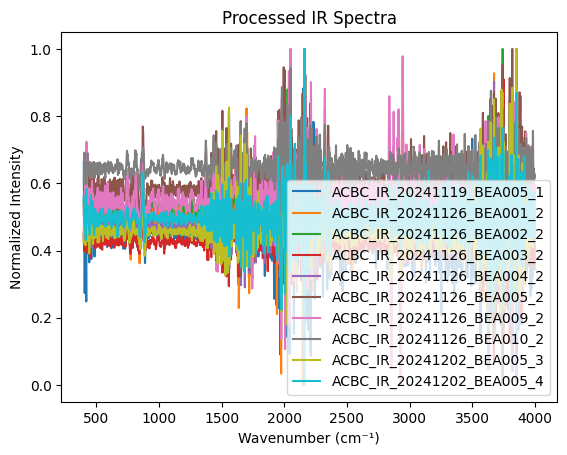

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler

# Function for baseline correction
def baseline_correction(y, window=101, polyorder=2):
    return y - savgol_filter(y, window_length=window, polyorder=polyorder)

# Load IR data
names = ["_2"]
data = load_IR(r"..\IR-Data\COS\Raw", names)

combined_df = None

for key, value in data.items():
    df = value['data']
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    # Baseline correction
    y_corrected = baseline_correction(y)

    # Normalize intensity
    y_normalized = (y_corrected - y_corrected.min()) / (y_corrected.max() - y_corrected.min())

    label = os.path.splitext(value['filename'])[0]  # Use filename (without extension) as column name
    temp_df = pd.DataFrame({'Wavenumber': x, label: y_normalized})

    if combined_df is None:
        combined_df = temp_df
    else:
        combined_df = pd.merge(combined_df, temp_df, on='Wavenumber', how='outer')

    # Plot each spectrum
    plt.plot(x, y_normalized, label=label)

# Reverse to go from 500 to 4000 cm⁻¹
combined_df = combined_df.iloc[::-1]

# Save combined and processed data
specifiedname = names[0]
combined_filename = f"{specifiedname}_Processed.csv"
combined_df.to_csv(combined_filename, index=False)
print(f"Saved combined file as {combined_filename}")

# Finalize and show plot
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.title("Processed IR Spectra")
plt.legend()
plt.show()
